## Plots Needed:
1. Average reward over frames seen (by env and all)
2. Success rate over frames seen (by env and all)
3. Length of reasoning over steps

In [18]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import pandas as pd

In [2]:
sns.set_theme(style="whitegrid", context="paper")
api = wandb.Api()

In [3]:
non_reasoning_run = api.run("OE_2025/final_runs/r5tb05d8")
reasoning_run = api.run("OE_2025/final_runs/sn73rnpv")

In [4]:
non_reasoning_history = non_reasoning_run.history()
reasoning_history = reasoning_run.history()

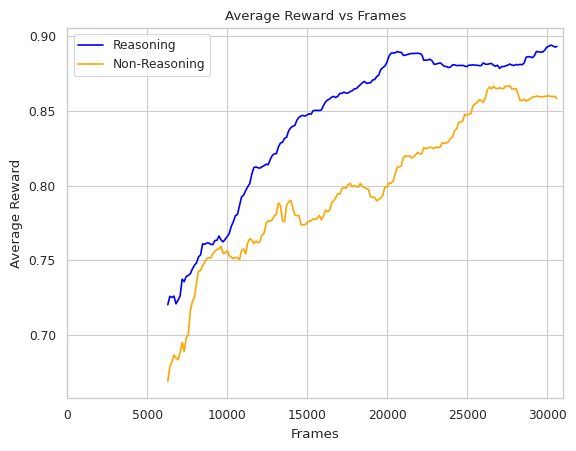

In [67]:
rolling_window = 50
cutoff = 240

history = reasoning_history
xs = history['_step'][:cutoff] * 128
ys = history['all_avg_reward'].rolling(rolling_window).mean()[:cutoff]
sns.lineplot(x=xs, y=ys, label="Reasoning", color='blue');

history = non_reasoning_history
xs = history['_step'][:cutoff] * 128
ys = history['all_avg_reward'].rolling(rolling_window).mean()[:cutoff]
sns.lineplot(x=xs, y=ys, label="Non-Reasoning", color='orange');

plt.legend()
plt.grid(True)
plt.xlim(0, 31_000)
plt.title("Average Reward vs Frames")
plt.xlabel("Frames")
plt.ylabel("Average Reward")
plt.show()

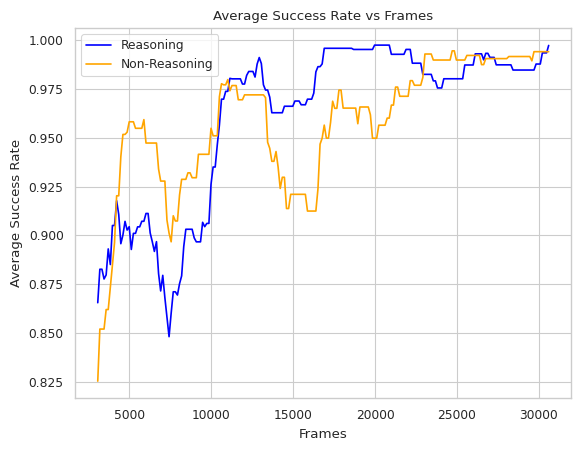

In [60]:
rolling_window = 25
cutoff = 240

history = reasoning_history
xs = history['_step'][:cutoff] * 128
ys = history['all_success_rate'].rolling(rolling_window).mean()[:cutoff]
sns.lineplot(x=xs, y=ys, label="Reasoning", color='blue');

history = non_reasoning_history
xs = history['_step'][:cutoff] * 128
ys = history['all_success_rate'].rolling(rolling_window).mean()[:cutoff]
sns.lineplot(x=xs, y=ys, label="Non-Reasoning", color='orange');

plt.legend()
plt.grid(True)
# plt.xlim(0, 31_000)
plt.title("Average Success Rate vs Frames")
plt.xlabel("Frames")
plt.ylabel("Average Success Rate")
plt.show()

In [ ]:
reasoning_run = api.run("OE_2025/final_runs/sn73rnpv")
reasoning_run_history = reasoning_run.history()
steps = reasoning_run_history['_step']

avg_reasoning_lengths = []
for step in steps[:]:
    artifact = api.artifact(f"OE_2025/final_runs/run-sn73rnpv-game_log:v{step}")
    artifact_dir = artifact.download()

    table_path = os.path.join(artifact_dir, "game_log.table.json")
    with open(table_path, 'r') as f:
        table = json.load(f)

    responses = [response for (query, response, reward) in table['data']]
    reasoning_lengths = []
    for response in responses:
        if 'final answer' in response:
            reasoning = response.split('final answer')[0]
            reasoning_lengths.append(len(reasoning.split()))
    avg_reasoning_length = sum(reasoning_lengths) / len(reasoning_lengths)
    avg_reasoning_lengths.append(avg_reasoning_length)

wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downloaded.  
wandb:   1 of 1 files downlo

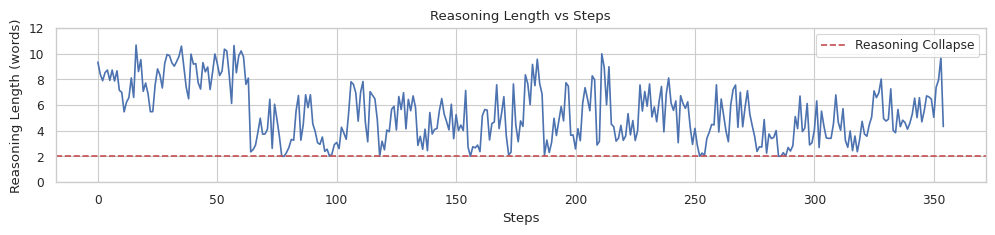

In [79]:
window_size = 1  # Adjust the window size as needed
moving_avg = pd.Series(avg_reasoning_lengths).rolling(window=window_size).mean()

plt.figure(figsize=(12, 2))
sns.lineplot(x=steps, y=moving_avg)
plt.axhline(y=2, color='r', linestyle='--', label='Reasoning Collapse')
plt.title("Reasoning Length vs Steps")
plt.xlabel("Steps")
plt.ylabel("Reasoning Length (words)")
plt.ylim(0, 12)
plt.grid(True)
plt.legend()
plt.show()

In [66]:
for i, v in enumerate(avg_reasoning_lengths):
    print(i, v)

0 9.333333333333334
1 8.39655172413793
2 7.888
3 8.511811023622048
4 8.716535433070867
5 7.912
6 8.716535433070867
7 7.864
8 8.658536585365853
9 7.134920634920635
10 6.984126984126984
11 5.4609375
12 6.21875
13 6.566929133858268
14 8.1015625
15 6.5859375
16 10.6640625
17 8.598425196850394
18 9.52991452991453
19 7.0546875
20 7.703125
21 6.875
22 5.46875
23 5.480314960629921
24 7.5859375
25 8.8046875
26 8.328125
27 7.3203125
28 9.2421875
29 9.929133858267717
30 9.8359375
31 9.28225806451613
32 9.015625
33 9.3828125
34 9.796875
35 10.582677165354331
36 9.015748031496063
37 7.377952755905512
38 6.4765625
39 9.960629921259843
40 9.1796875
41 9.21875
42 7.734375
43 7.234375
44 9.296875
45 8.578125
46 8.953125
47 7.203125
48 8.4921875
49 9.96875
50 9.2265625
51 8.2890625
52 8.6328125
53 10.34375
54 10.1953125
55 8.328125
56 6.1171875
57 10.625
58 8.5078125
59 9.8359375
60 10.203125
61 9.73228346456693
62 7.6015625
63 8.0859375
64 2.34375
65 2.515625
66 2.859375
67 3.8515625
68 4.9609375
69 3.